In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Dimensionality Reduction**

## Principal Component Analysis (PCA) Explained

### 1. Introduction:

- **Objective:** PCA is a dimensionality reduction technique used in machine learning and statistics. The primary goal is to reduce the number of features in a dataset while preserving the most important information.
- **Why PCA?** It helps in simplifying complex datasets, making them more manageable for analysis and modeling, and often improving the performance of machine learning algorithms.

## 2. Underlying Principle:

- **Variance Maximization:** PCA works by identifying the directions (principal components) along which the data varies the most. The first principal component captures the maximum variance, the second captures the second maximum, and so on.
- **Orthogonality:** Each principal component is orthogonal (uncorrelated) to the others, ensuring that they represent different aspects of the data.

## 3. Steps of PCA:

### a. Standardization:

- **Why?** Standardizing the data (subtracting the mean and dividing by the standard deviation) ensures that all variables have the same scale.
- **Analogy:** Imagine you have data in feet and miles. Standardization converts them to a common unit, like meters, making them comparable.

### b. Covariance Matrix:

- **Calculation:** Compute the covariance matrix of the standardized data.
- **Importance:** The covariance matrix shows how different features vary together.
- **Analogy:** Think of it as a compass pointing in the direction of the maximum variance in your data space.

### c. Eigenvalues and Eigenvectors:

- **Eigenvalues:** These represent the magnitude of variance in the direction of the corresponding eigenvector.
- **Eigenvectors:** These are the directions in the feature space.
- **Analogy:** Imagine your data as a topographic map; eigenvalues are the elevations, and eigenvectors are the directions where the terrain changes the most.

### d. Principal Components Selection:

- **Sorting:** Sort eigenvalues in descending order. The corresponding eigenvectors are the principal components.
- **Selection:** Choose the top k eigenvectors to form the matrix \(W\), where \(k\) is the desired dimensionality.
- **Analogy:** It's like selecting the most prominent features in your landscape that capture the essence of the terrain.

### e. Projection:

- **Transformation:** Multiply the original data by \(W\) to get the new, lower-dimensional representation.
- **Analogy:** Projecting a 3D object onto a 2D plane – you retain the most important views.

### 4. Interpretation:

- **Variance Retention:** The amount of variance retained by the selected components indicates how much information is preserved.
- **Analogy:** If you capture 95% of the variance, it's like summarizing a book but still understanding most of its plot.

### 5. Use Cases:

- **Dimensionality Reduction:** Reducing the number of features while retaining important information.
- **Noise Reduction:** Removing less relevant information.
- **Visualization:** Reducing data to 2 or 3 dimensions for easy plotting.

### Conclusion:

PCA is a powerful tool for simplifying and extracting valuable information from complex datasets. Remember, it's not about memorizing the steps, but understanding the underlying principles and how each step contributes to achieving the goal of dimensionality reduction.


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

After scaling the data, apply PCA

In [3]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

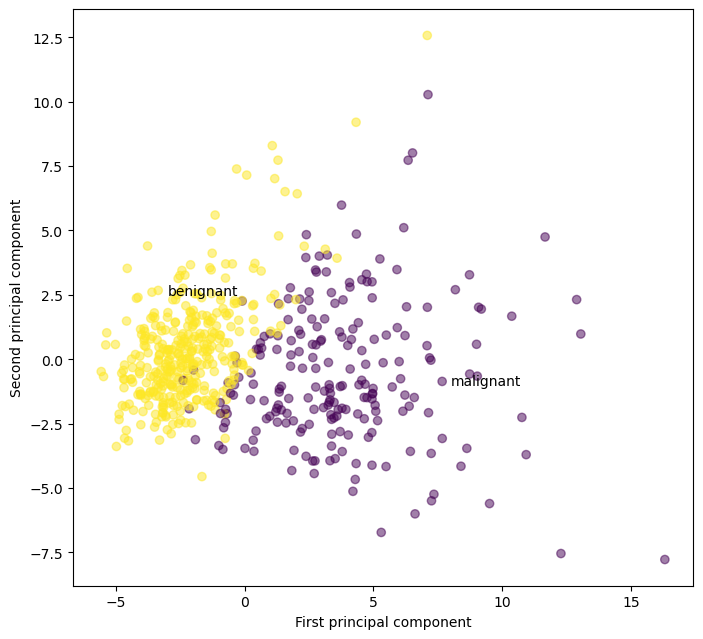

In [15]:
# colors for distinguishing between classes
# colors = list(map(lambda x: 'red' if x == 0 else 'blue', cancer.target))

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, alpha=0.5)
# plt.legend(cancer.target_names, loc="best")
plt.annotate('malignant', xy=(8,-1))
plt.annotate('benignant', xy=(-3,2.5))
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Downside of PCA is that the two axes in the plot are often not very easy to interpret.
The principal components correspond to directions in the original data, so they are
combinations of the original features. However, these combinations are usually very
complex, as we’ll see shortly. The principal components themselves are stored in the
components_ attribute of the PCA object during fitting:

from sklearn

In [5]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [6]:
from sklearn.datasets import fetch_lfw_people

ppl = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False)

In [7]:
print(ppl.images.shape)
print(len(ppl.target_names))

(2432, 87, 65)
41


In [8]:
np.bincount(ppl.target)

array([ 39,  35,  21,  36,  77,  24,  29, 236, 121,  22, 530, 109,  44,
        22,  39,  71,  20,  28,  52,  55,  21,  42,  53,  28,  60,  32,
        41,  22,  41,  33,  20,  22,  26,  23,  52,  23,  25,  33, 144,
        32,  49])

In [9]:
ppl.target[np.where(ppl.target == 7)[0][:50]]

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [10]:
ppl.target

array([ 7, 34,  8, ..., 10, 12, 10])

Following code block is copied from the book:

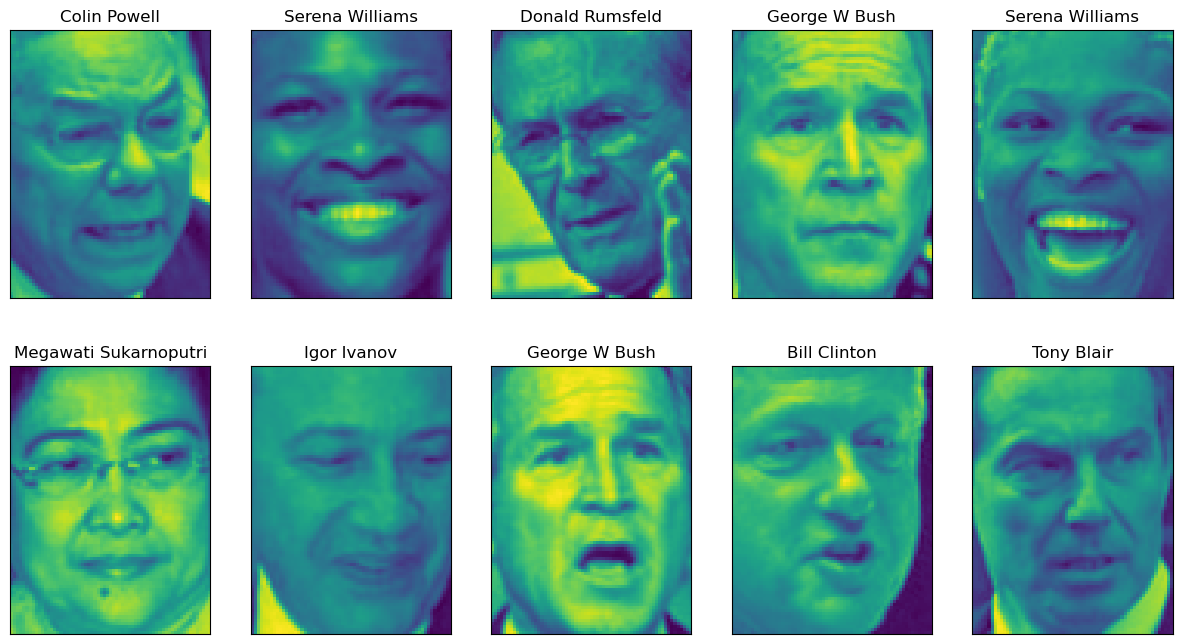

In [11]:

image_shape = ppl.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(ppl.target, ppl.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(ppl.target_names[target])

In [12]:
ppl.images.shape

(2432, 87, 65)

*** 

# Non-Negative Matrix Factorization (NMF) Explained

## 1. Objective:

- **Goal:** Given a non-negative matrix $V$, NMF aims to find two non-negative matrices, $W$ and $H$, such that $V \approx WH$.
- **Interpretation:** Think of $W$ as representing the features or basis vectors, and $H$ as representing how these features combine to reconstruct the original data $V$.

## 2. Non-Negativity Constraint:

- **Key Assumption:** All elements in matrices $W$ and $H$ are non-negative.
- **Motivation:** This constraint makes the factorization more interpretable in various applications. For example, in text mining, the non-negativity constraint allows each topic to be associated only with positive weights.

## 3. Optimization Problem:

- **Minimization Objective:** The factorization is achieved by minimizing a cost function, typically the Frobenius norm or Kullback-Leibler divergence, subject to non-negativity constraints.
- **Objective Function:** $ \min_{W, H} \, \text{Cost}(V, WH) $
- **Update Rules:** Iterative algorithms, such as multiplicative updates, are commonly used to optimize $W$ and $H$ alternately until convergence.

## 4. Interpretation of Matrices $W$ and $H$:

- **Matrix $W$:**
  - Columns of $W$ represent the basis vectors or features.
  - Each column corresponds to a pattern or component in the data.
- **Matrix $H$:**
  - Rows of $H$ represent the coefficients indicating how much each basis vector contributes to reconstructing each data point.
  - Each row in $H$ is a set of weights associated with the features in $W$.

## 5. Applications:

- **Image Processing:** NMF can be used for image compression, where $W$ represents the basis images, and $H$ represents the coefficients for each image.
- **Text Mining:** In topic modeling, $W$ may represent the topics, and $H$ represents the distribution of topics in each document.
- **Audio Signal Processing:** NMF is used for source separation, where $W$ represents the basis signals, and $H$ represents their contribution to the observed signals.

## 6. Advantages:

- **Parts-Based Representation:** NMF often leads to a parts-based representation, where the learned basis vectors can be interpreted as meaningful components of the data.
- **Non-Negative Constraints:** The non-negativity constraint makes the factorization suitable for data where negative values have no physical meaning.

## 7. Challenges:

- **Non-Convex Optimization:** The optimization problem in NMF is non-convex, and finding the global minimum can be challenging.
- **Initializations:** Choice of initial values for $W$ and $H$ can impact convergence and the quality of the factorization.

Non-Negative Matrix Factorization is a powerful technique, especially when dealing with data that naturally has non-negative properties. It provides a way to represent data in a more interpretable and meaningful form, making it a valuable tool in various data analysis tasks.


*** 

In [13]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=None)

nmf.fit(X)

SyntaxError: expected argument value expression (1392923114.py, line 5)

***

# Manifold Learning: t-SNE Algorithm

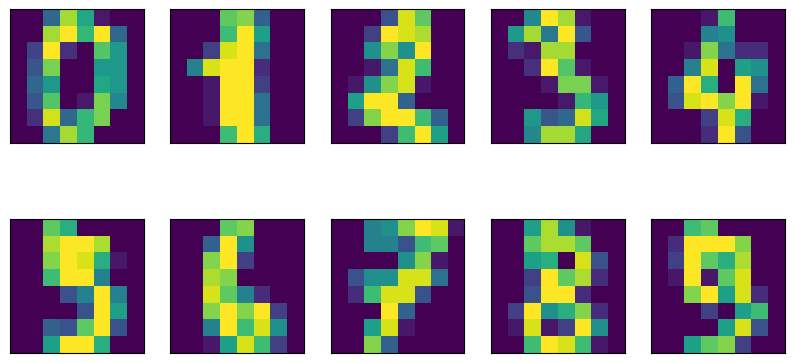

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

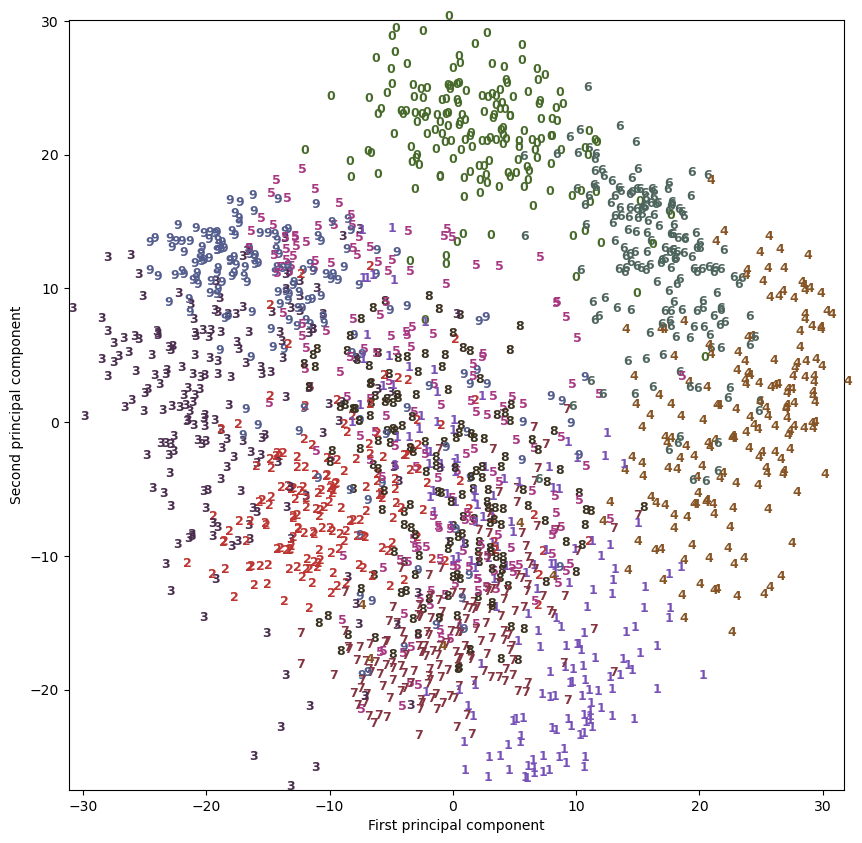

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 't-SNE feature 1')

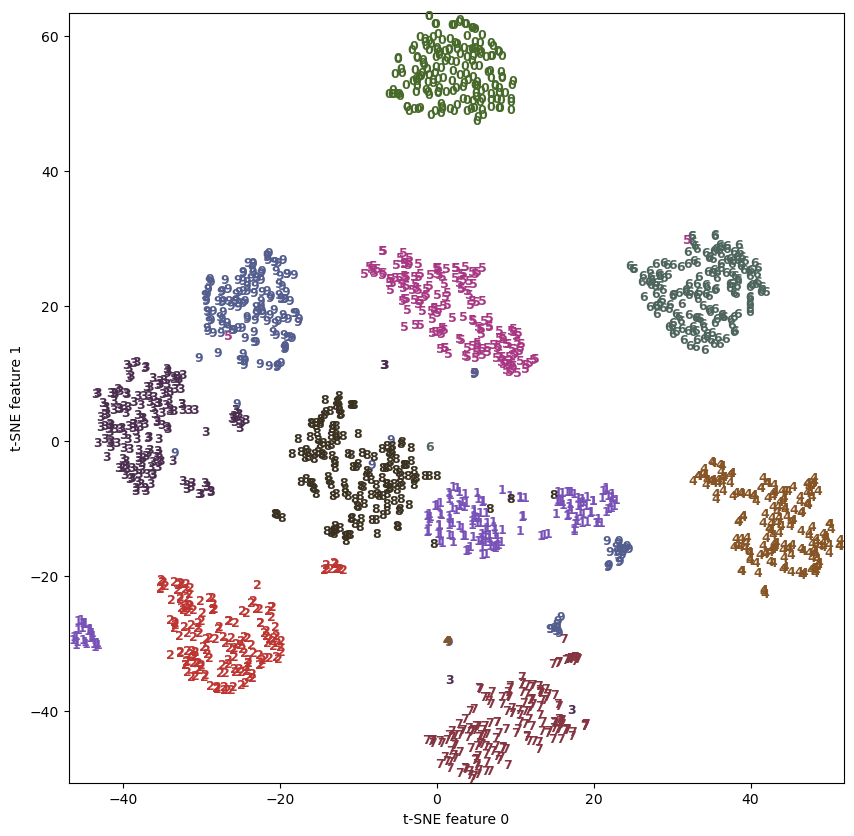

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")